In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
filepath1 = r"C:\Users\I324158\OneDrive - SAP SE\Machine Learning\Dataset\data\relayr_Data Scientist_assigment\predictors.csv"
filepath2 = r"C:\Users\I324158\OneDrive - SAP SE\Machine Learning\Dataset\data\relayr_Data Scientist_assigment\labels.csv"

In [3]:
#Load the data from file
class Load_Content:
    def __init__(self,filepath1,filepath2):
        self.path1 = filepath1
        self.path2 = filepath2
    def read_content(self):
        df1 = pd.read_csv(self.path1)
        df2 = pd.read_csv(self.path2)
        df_raw = pd.merge(df1,df2,how='left',on='timestamp')
        
        return df_raw
    def show_content(self):
        print(df_raw.head())
        print(df_raw.columns)
        
        
lc = Load_Content(filepath1,filepath2)
df_raw_data = lc.read_content()   
df_raw_data.head()

#convert timestamp to datetime format
def convert_timestamp():
    ds_convert = pd.to_datetime(df_raw_data['timestamp'], unit='s')
    #convert to dataframe
    df_convert = ds_convert.to_frame(name='DateTime')
    print(df_convert.head())
    return df_convert
df_convert = convert_timestamp()    

def combine_drop_date():
    df_final = pd.concat([df_convert, df_raw_data],axis = 1)
    df_final.drop(columns=['timestamp'],inplace=True)
    return df_final
#     print(df_final.head())

df_final = combine_drop_date()

def check_index_duplicates():
    a = df_final['DateTime'].nunique()
    b = len(df_final)
    if a<b:
        df_final.drop_duplicates(subset = ['DateTime'], keep ="first",inplace=True)
    return df_final

df_final = check_index_duplicates()

             DateTime
0 2013-05-11 00:00:00
1 2013-05-11 00:05:00
2 2013-05-11 00:10:00
3 2013-05-11 00:15:00
4 2013-05-11 00:20:00


In [4]:
df_final['DateTime'].nunique()
len(df_final)
df_final['DateTime'].nunique() == len(df_final)

True

In [5]:
#Check how many percentage of Null values on each columns
def calculate_null():
    columns = list(df_final.columns)
    for col in columns:
        nv = df_final[col].isna().sum()
        print("Percentage of Null values for column {} = {}".format(col,(nv/len(df_final))*100))

calculate_null()

Percentage of Null values for column DateTime = 0.0
Percentage of Null values for column f0 = 54.59117934706676
Percentage of Null values for column f1 = 57.00855364267197
Percentage of Null values for column f2 = 0.020181008118974806
Percentage of Null values for column f3 = 0.020181008118974806
Percentage of Null values for column f4 = 3.9430585093996924
Percentage of Null values for column f5 = 1.5148175171150473
Percentage of Null values for column f6 = 0.5852492354502694
Percentage of Null values for column f7 = 93.97022525109831
Percentage of Null values for column f8 = 2.0000931431143956
Percentage of Null values for column f9 = 0.46695748016827854
Percentage of Null values for column f10 = 68.58748467019575
Percentage of Null values for column f11 = 0.020181008118974806
Percentage of Null values for column f12 = 3.9405746930158183
Percentage of Null values for column f13 = 0.021422916310911717
Percentage of Null values for column f14 = 0.02359625564680131
Percentage of Null val

In [6]:
#drop columns where columns has more than 30% NULL values except label
def delete_nacolums():
    df_final.drop(columns=['f61','f77','f0','f1','f7','f10','f83','f85','f86'],inplace=True)
    return df_final

df_final = delete_nacolums()

In [7]:
# set datetime as index 
df_final.set_index('DateTime',inplace=True)

In [8]:
len(list(df_final.index))

322085

In [9]:
# df_final.asfreq('5min').plot()

In [342]:
# rolmean = df_final['label'].rolling('5min').mean()
# rolstd = df_final['label'].rolling('5min').std()

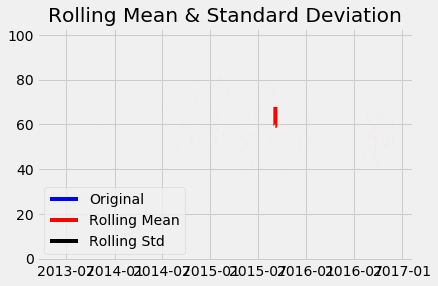

In [343]:
# orig = plt.plot(df_final['label'], color='blue', label='Original')
# mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# std = plt.plot(rolstd, color='black', label='Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

In [299]:
# fill NaN value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# from sklearn.impute import KNNImputer
# from sklearn.impute import SimpleImputer
# # imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# # X_train_new = imp.fit_transform(X_train)
# # X_test_new = imp.transform(X_test)

imp = IterativeImputer(max_iter=10, random_state=0)
np_II = imp.fit_transform(df_final)




# # imputer = KNNImputer(n_neighbors=5, weights="uniform")
# # imputer.fit_transform(X_train)


In [348]:
def rebuild_dataframe():
    df_II_df = pd.DataFrame(np_II,index=df_final.index)
    df_II_df.isna().sum()
    df_II_df.head()
    len(df_II_df)
    return df_II_df

df_II_df = rebuild_dataframe()

In [12]:
path = r"C:\Users\I324158\OneDrive - SAP SE\Machine Learning\Dataset\data\clean.csv"
# df_II_df.to_csv(path)
df_II_df= pd.read_csv(path)

# df_II_df.set_index('DateTime',inplace=True)




In [393]:
len(df_II_df.columns.tolist())

79

In [390]:
# plt.subplots(figsize=(30,25))
# sns.heatmap(data=df_II_df.corr(),annot=True)
# plt.show()
# plt.gcf().clear()

In [391]:
# df_II_df[0][:'2016'].plot(figsize=(16,4),legend=True)
# df_II_df[1][:'2016'].plot(figsize=(16,4),legend=True)

In [392]:
# groups = [0, 1, 2, 3, 5, 6, 7]
# i=1
# values = df_final.values
# plt.figure()
# for group in groups:
#     plt.subplot(len(groups), 1, i)
#     plt.plot(values[:, group])
#     plt.title(df_final.columns[group], y=0.5, loc='right')
#     i += 1
# plt.show()

## Dimensionality Reduction 
* PCA
* t-SNE
* Autoencoder


In [15]:
#do the scaling 
from sklearn.preprocessing import MinMaxScaler
X = df_II_df.iloc[:,:78]
y = df_II_df.iloc[:, 78:]
len(X.columns.tolist())
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(X)

df_scaled_y = sc.fit_transform(y)



# PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def do_pca():
    n_comp = 5
    pca = PCA(n_components=n_comp,random_state=20)
    df_pca = pca.fit_transform(df_scaled)
    print(pca.explained_variance_)
    return df_pca

df_pca=do_pca()
df_pca_tf = pd.DataFrame(df_pca,index=df_final.index)


[0.51364931 0.40077571 0.18371959 0.13697003 0.10758748]


# T-SNE

In [423]:
# X_embedded = TSNE(n_components=2).fit_transform(df_scaled)
# X_embedded = pd.DataFrame(X_embedded)
# X_embedded.head()

# Autoencoder

In [428]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [430]:
ncol = df_scaled.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, df_scaled_y, train_size = 0.9, random_state = 20)
encoding_dim = 5

input_dim = Input(shape = (ncol, ))

# # Encoder Layers
encoded1 = Dense(50, activation = 'relu')(input_dim)
encoded2 = Dense(30, activation = 'relu')(encoded1)
encoded13 = Dense(encoding_dim, activation = 'relu')(encoded2) #5
# Decoder Layers
decoded1 = Dense(30, activation = 'relu')(encoded13)
decoded2 = Dense(50, activation = 'relu')(decoded1)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded2)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded13)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

autoencoder.summary()

autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))


#Model for Encoder
encoder = Model(inputs = input_dim, outputs = encoded13)

#Model for decoder
encoded_input = Input(shape = (encoding_dim, ))
#Below 2 lines are not required as we are just reducing the dimension.
# decoder_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoder_layer(encoded_input))

encoded_train = pd.DataFrame(encoder.predict(df_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(df_scaled))
encoded_test = encoded_test.add_prefix('feature_')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 78)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3950      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 155       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                180       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_12 (Dense)             (None, 78)                3978      
Total para

In [442]:
# plt.figure()
# plt.plot(hist_auto.history['loss'])
# plt.plot(hist_auto.history['val_loss'])
# plt.title('Autoencoder model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()


322085

# Rolling window after scaling

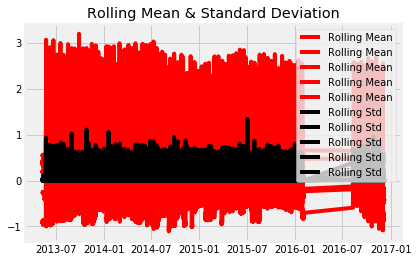

In [21]:
rolmean = df_pca_tf.rolling(window =12).mean() 
rolstd = df_pca_tf.rolling(window =12).std()

#Plot roll statistics
# orig = plt.plot(df_pca_tf, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Results of Dickey Fuller Test

In [22]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_pca_tf[0], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -29.316817
p-value                             0.000000
#Lags Used                         90.000000
Number of Observations Used    321994.000000
Critical Value (1%)                -3.430370
Critical Value (5%)                -2.861549
Critical Value (10%)               -2.566775
dtype: float64


# ACF & PACF plots 

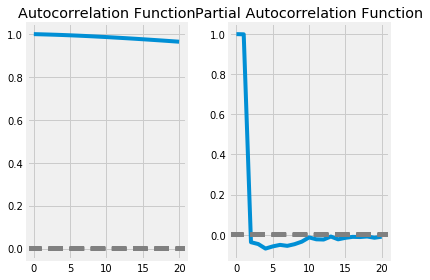

In [43]:
#ACF & PACF plots

lag_acf = acf(df_pca_tf[0], nlags=20)
lag_pacf = pacf(df_pca_tf[0], nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_pca_tf)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_pca_tf)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_pca_tf)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_pca_tf)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            


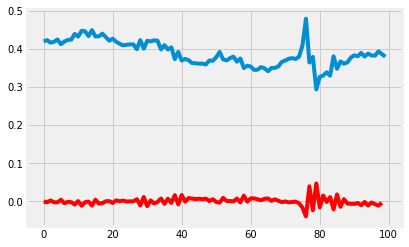

In [46]:
myarray = np.array(df_pca_tf.iloc[:100,0:1])
type(myarray)
# from statsmodels.tsa.ar_model import AR
model = ARIMA(myarray,order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  

plt.plot(myarray)
plt.plot(results_AR.fittedvalues, color='red')

# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_pca_tf)**2))

In [443]:
import h2o

In [444]:
from h2o.automl import H2OAutoML

In [445]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\I324158\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\I324158\AppData\Local\Temp\tmpyixz1_9r
  JVM stdout: C:\Users\I324158\AppData\Local\Temp\tmpyixz1_9r\h2o_I324158_started_from_python.out
  JVM stderr: C:\Users\I324158\AppData\Local\Temp\tmpyixz1_9r\h2o_I324158_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,1 month and 5 days
H2O cluster name:,H2O_from_python_I324158_ml2dct
H2O cluster total nodes:,1
H2O cluster free memory:,3.521 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [123]:
# import os
# file_path = r'C:\Users\I324158\OneDrive - SAP SE\Machine Learning\Dataset\data\relayr_Data Scientist_assigment\Combine.csv'

In [446]:
# # df_data = h2o.import_file(file_path)
# df_data = h2o.H2OFrame(df_II_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [448]:
# df_data.describe()

Rows:322086
Cols:79




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,-0.4763328415840572,31.28125063719003,-14908.321686953306,3858.488805631112,30.17547528689917,-2476.808619217016,-2156.956016896293,-9829.72967593112,-98908.77102478092,-3.950770451227748,-67.86680841731379,24.39438904494793,9484.063717147816,-71.18090246495159,0.29758424690875696,-4940.105065670798,14328.908123207611,-157.92965861555876,-808.8263638029783,-9.661009894335194,34992.8922922577,93886.03267990769,-132.93543314561248,-0.7116641020426173,7.385058578464746,-2441.9663819372654,-0.3146735300613609,-13.931277400057144,4510.561772605361,9.693918299033236,812.7051530572385,-6667.337029387635,-4.284562795387087,982.7854960097686,0.6593320611390061,-0.1306332851197085,-715.5337176803972,7187.7998418641,10661.672965190415,-0.28407804902073475,548.7559005015378,-472.0769694801229,-40.494102309697965,-5.951299462640684,-702.3071496854354,664.2668976893127,0.6715275452464595,-89602.73147877636,-6.585313958020414,-416.73044560694944,2.2336346577558395,424.02768807351305,0.09423008365348162,7628.455374913712,0.9749825443699752,-4.505857302041084,-0.9761846438582944,-39.96676044062985,74.24669547083613,-734.0832735131171,564.9378033225081,385.15039772275816,-8.836137187361311,-2461.5222368223376,-6.955299239615562,-914.8729767799376,-332.99938842732945,10225.167659174916,6.995417708733339,-0.8331160413378191,-87.05807448404506,1.689063943054232,-76.09385251672099,-499.1766077526666,-92.40134808881372,-99859.65157404152,-0.059643873749204435,0.6078185476799263,-356.60052458478424
mean,197.82145963018982,32.08836771885973,31188.493321659866,3862.486362307335,608.2550300002113,6.789389336994984,2131.7293043691147,-9829.61843399133,-98893.33669654398,-0.17255481641027706,4093.9210563870156,26.739119277398583,9484.25410767514,-60.24775025561675,2185.535236718269,-4939.8847734285855,14332.411398062251,63229.55026715005,-746.9041594545117,-8.908487852988172,34994.827207684044,93890.43123662219,395.27707578194384,5.241429907439366,91.33041665398662,995.7139123833242,700.6880254674118,-13.84056770991339,4514.7840387017495,13611.426413908515,5467.619029670599,-6604.8276670142495,48092.16081851758,1259.113606230055,1.2340416499647888,1.5761904033882548,-715.5051551012931,7188.337059255158,10662.226830516247,0.7738126239650192,1903.626963208006,4181.263543827483,443.26047818176653,-5.703819893280376,-616.4565570409522,676.5459560214531,1.0319692011728605,-89471.34445323297,2933.974969925798,-415.97049352856925,2.301424884722916,829.6421115962612,0.20160987171833647,7974.393692208632,1739.807265495123,-4.378563193936122,198.03825821202392,-37.726002625060985,78.85751493604361,-730.2592713991365,577.6824049335955,389.61477407486734,-8.039799381973342,-2461.3557491857414,34.431822004312416,1897.7064057022174,-329.9964137978571,10288.482210392407,9.953517303538002,1339.2776082948446,64867.84562735845,2507.798567047461,4089.7428402896594,-483.3233988519064,-92.02465107596197,-99859.2260218842,0.32425348807076637,0.9179845197488598,43.892483411385285
maxs,436.0362037868612,33.40977526603983,78621.39042830115,3867.615676730391,1059.023137207143,9255.390900470498,13845.12202830174,-9829.252284881706,-98870.1497398047,1.0088708805622404,24539.734137571348,28.67866941219005,9484.723683240603,-53.54052024099679,9657.534507591672,-4939.821340957305,14333.441930403083,87135.12707267003,-731.3168477669929,-7.257050629833647,34995.85118

In [455]:

# y = '78'

In [456]:
# splits = df_data.split_frame(ratios = [0.8], seed = 1)
# train = splits[0]
# test = splits[1]

In [457]:
# aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "testingH2o1")
# aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |
15:55:27.134: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [ ]:
# aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "ptest1")
# aml2.train(y = y, training_frame = df_data)

In [458]:
# aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_20200122_155527,1.91866,1.38516,1.91866,0.720872,nan


In [150]:
# aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200121_003939,124.285,11.1483,124.285,8.31403,0.234233
StackedEnsemble_BestOfFamily_AutoML_20200121_003939,124.285,11.1483,124.285,8.31403,0.234233
DRF_1_AutoML_20200121_003939,126.665,11.2545,126.665,8.34702,0.235589
GLM_1_AutoML_20200121_003939,133.66,11.5611,133.66,8.79805,0.23876


In [459]:
# pred = aml.predict(test)
# pred.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
47.0111
47.3929
47.1783
48.6049
47.9151
48.5562
48.5421
49.0953
47.9463
48.1522


In [460]:
# perf = aml.leader.model_performance(test)
# perf


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.9186566591627263
RMSE: 1.3851558248669087
MAE: 0.7208722162145739
RMSLE: NaN
R^2: 0.9995071463226961
Mean Residual Deviance: 1.9186566591627263
Null degrees of freedom: 64238
Residual degrees of freedom: 64160
Null deviance: 250082090.5597449
Residual deviance: 123252.58512795437
AIC: 224322.1415187579
